# Gradient Descent in python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create data with $\theta_0 = 6$ and $\theta_1 = 2$ and add some noise.

In [2]:
x = 3 * np.random.rand(100, 1)
y = 6 + 2 * x + np.random.randn(100,1)

Text(0, 0.5, '$y$')

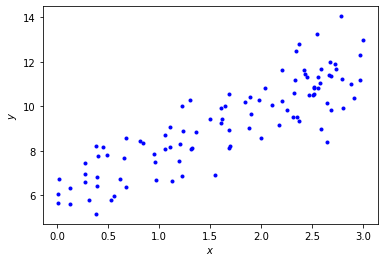

In [3]:
plt.plot(x,y, 'b.')
plt.xlabel('$x$')
plt.ylabel('$y$')

## Cost and Grad functions
Cost:
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m( h(\theta)^{(i)} - y^{(i)} )^2$$

Gradient:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m( h(\theta)^{(i)} - y^{(i)} ).X_j^{(i)}$$

In [4]:
def cost(theta, x, y):
    m = len(y)
    preds = x.dot(theta)
    cost = (1/2*m)*np.sum(np.square(preds - y))
    return cost

In [5]:
def grad_desc(x, y, theta, lr = 0.01, iters = 100):
    m = len(y)
    cost_hist = np.zeros(iters)
    theta_hist = np.zeros((iters, 2))
    for i in range(iters):
        
        pred = np.dot(x,theta)
        
        theta = theta - (1/m)*lr*(x.T.dot((pred - y)))
        theta_hist[i,:] = theta.T
        cost_hist[i] = cost(theta, x, y)
        
    return theta, cost_hist, theta_hist

In [6]:
iters = 1000
lr = 0.01
theta = np.random.randn(2,1)
x_b = np.c_[np.ones((len(x),1)),x]
theta,cost_hist,theta_hist = grad_desc(x_b, y, theta, lr, iters)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_hist[-1]))

Theta0:          5.561,
Theta1:          2.167
Final cost/MSE:  5263.233


In [7]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iters),cost_hist,'b.')